# Data Scraping

In [62]:
from bs4 import BeautifulSoup
import json
import urllib.request as urllib2
import random
from random import choice
import numpy as np
import time
import logging
import pandas as pd
import requests
import re
from money_parser import price_str

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
def urlquery(url):
    # function cycles randomly through different user agents and time intervals to simulate more natural queries
    try:
        sleeptime = float(random.randint(1, 3)) / 10
        time.sleep(sleeptime)

        agents = ['Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17',
        'Mozilla/5.0 (compatible; MSIE 10.6; Windows NT 6.1; Trident/5.0; InfoPath.2; SLCC1; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729; .NET CLR 2.0.50727) 3gpp-gba UNTRUSTED/1.0',
        'Opera/12.80 (Windows NT 5.1; U; en) Presto/2.10.289 Version/12.02',
        'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)',
        'Mozilla/3.0',
        'Mozilla/5.0 (iPhone; U; CPU like Mac OS X; en) AppleWebKit/420+ (KHTML, like Gecko) Version/3.0 Mobile/1A543a Safari/419.3',
        'Mozilla/5.0 (Linux; U; Android 0.5; en-us) AppleWebKit/522+ (KHTML, like Gecko) Safari/419.3',
        'Opera/9.00 (Windows NT 5.1; U; en)']

        agent = choice(agents)
        opener = urllib2.build_opener()
        opener.addheaders = [('User-agent', agent)]

        html = opener.open(url).read()
        time.sleep(sleeptime)
        
        return html
        print('works')
    except Exception as e:
        print('Something went wrong with Crawling:\n%s' % e)

In [ ]:
pages=100
expose=[]
for page in range(pages):
       # print(f'parsing page no: {page}')
        base_url = 'https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen'
        if page == 0:
            page_url = ''
        else:
            page += 1
            page_url = f'/seite-{page}'
        url = base_url + page_url

        flats = urlquery(url)
        soupflats = BeautifulSoup(flats,'lxml')
        if soupflats.find_all("a", class_=['eFN8Y']):
            for paragraph in soupflats.find_all("a", class_=['eFN8Y']):
                ex=paragraph.get('href')[8:]
                ex='/immobilien/'+ex
            #'/expose/5ee245b1f00e3a0021767995'
                expose.append(ex)
        if soupflats.find_all("a", class_=['_2jYX4']):
            for paragraph in soupflats.find_all("a", class_=['_2jYX4']):
                ex=paragraph.get('href')[8:]
                ex='/immobilien/'+ex
                expose.append(ex)

       # print('total number of flats:'+str(len(expose)))
#print(expose)       

In [ ]:
urls=list()
for i in range(len(expose)):
    exposes=expose[i]
    i += 1
    url = 'https://www.immobilienscout24.at' + str(exposes)
    urls.append(url)

In [ ]:
len(urls)

In [ ]:
data=[]
for i in range(len(urls)):
    try:
            u=urls[i]
            flat = urlquery(urls[i])
            soup = BeautifulSoup(flat,'lxml')
            #print('Url '+str(i) +': ' + str(u))
            if soup.find("div", attrs={"class": 'relative z-index-10 ooPHZ _31oAP _3JAJs hkHjH'}):

                price = soup.find("div", attrs={"class": 'relative z-index-10 ooPHZ _31oAP _3JAJs hkHjH'}).text
                if 'ab' in price:
                    continue
                if '– ' in price:
                    continue
                price=price_str(price)
               # print(i)
                
            else:
                continue

            title = soup.find("h1", attrs={"class": '_31oAP SCZE7 hkHjH'}).text
            sqrm=soup.find_all('span', class_=['_25EOZ _31oAP _3JAJs hkHjH'])[0].text
            sqrm=re.findall(r'\d+',sqrm)[0]

            try:

                if soup.find_all('span', class_=['_25EOZ _31oAP _3JAJs hkHjH']):

                    numofroom=soup.find_all('span', class_=['_25EOZ _31oAP _3JAJs hkHjH'])[1].text

            except:
                    numofroom=None

            my_list=soup.find_all("span", attrs={"class": '_1GS5x _31oAP _3JAJs'})
            tags=[]
            bedroom=baujahr=gesamtsqrm=gartensqrm=terrasesqrm=cellarsqrm=None
            bath=toilet=1
            balkon=parkplatz=parkm=cellar=garage=loggia=terrasse=garten=lift=erstbezug=neubau=altbau=kitchen=alarm=0


            for my_tags in my_list:
                if 'Zimmer' in my_tags.text:
                    continue
                if 'Schlafzimmer' in my_tags.text:
                    bedroom=re.findall(r'\d+',my_tags.text)[0]
                    continue
                if 'Badezimmer' in my_tags.text:
                    bath=re.findall(r'\d+',my_tags.text)[0]
                    continue
                if 'Toiletten' in my_tags.text:
                    toilet=re.findall(r'\d+',my_tags.text)[0]
                    continue
                if 'Balkon' in my_tags.text:
                    if re.findall(r'^Balkon',my_tags.text):
                        balkon=1
                    else:
                        balkon=re.findall(r'\b\d+\b',my_tags.text)[0]
                    continue
                if 'Parkplätz' in my_tags.text:
                    parkplatz=re.findall(r'\d+',my_tags.text)[0]
                    continue
                if 'Parkmöglichkeiten' in my_tags.text:
                    parkm=my_tags.text[:1]
                    continue
                if 'Garage' in my_tags.text: 
                    if re.findall(r'^Garage',my_tags.text):
                        garage=1
                    else:
                        garage=re.findall(r'\b\d+\b',my_tags.text)[0]
                    continue
                if 'Loggia' in my_tags.text: 
                    if re.findall(r'^Loggia',my_tags.text):
                        loggia=1
                    else:
                        loggia=re.findall(r'\b\d+\b',my_tags.text)[0]
                    continue
                if 'Terrasse' in my_tags.text: 
                    if re.findall(r'^Terrasse',my_tags.text):
                        terrasse=1
                    else:
                        terrasse=re.findall(r'\b\d+\b',my_tags.text)[0]
                    continue
                if 'Baujahr' in my_tags.text: 
                    baujahr=re.findall(r'\b\d+\b',my_tags.text)[0]
                    continue
                if 'Gesamtfläche' in my_tags.text: 
                    gesamtsqrm=float(my_tags.text[13:][:-3])
                    continue
                if 'Wohnfläche' in my_tags.text:
                    continue
                if 'Freiflächen' in my_tags.text:
                    continue      
                if 'Gartenfläche' in my_tags.text:
                    gartensqrm=float(my_tags.text[13:][:-3])
                    continue
                if 'Terrassenfläche' in my_tags.text: 
                    terrasesqrm=float(my_tags.text[16:][:-3])
                    continue
                if 'Kellerfläche' in my_tags.text:
                    cellarsqrm=float(my_tags.text[13:][:-3])
                    continue
                if 'Garten' in my_tags.text:
                    garten=1
                    continue
                if 'Personenaufzug' in my_tags.text:
                    lift=1
                    continue
                if 'Erstbezug' in my_tags.text:
                    erstbezug=1
                    continue
                if 'Neubau' in my_tags.text:
                    neubau=1
                    continue
                if 'Altbau' in my_tags.text:
                    altbau=1
                    continue
                if 'Einbauküche' in my_tags.text:
                    kitchen=1
                    continue
                if 'Alarmanlage' in my_tags.text:
                    alarm=1
                    continue
                else:
                    tags.append(my_tags.text)
            #adress=adr.find('span', class_=['_31oAP _3JAJs']).text
            #postzahl=re.findall(r'\b\d+\b',adress)[-1]
            #print(postzahl)
            if soup.find("div", attrs={"class": '_3T5Ms dnp0J _31oAP _3JAJs', 'style': '-webkit-line-clamp:3'}):
                beschreibung=soup.find("div", attrs={"class": '_3T5Ms dnp0J _31oAP _3JAJs', 'style': '-webkit-line-clamp:3'}).text

            data.append([u,title,price,sqrm,numofroom,bedroom,bath,toilet,balkon,
                         parkplatz,parkm,garage,loggia,terrasse,baujahr,gesamtsqrm,gartensqrm,terrasesqrm,
                         cellarsqrm,garten,lift,erstbezug,neubau,altbau,kitchen,alarm, #postzahl,adress
                         tags,beschreibung])
    except IndexError:
        print('ERROR')

# Data Manipulation

In [8]:
#Creating pandas dataframe
df = pd.DataFrame(data, columns=['url','title','price','sqm_living','room',
                                 'bedrooms','baths','toilets','balcony','park_space','parkm','garage','loggia','terrace',
                                 'yr_built','sqm_lot','sqm_garten','sqm_terrace','sqm_cellar',
                                 'garten','lift','erstbezug','new_bld','old_bld','kitchen','alarm',#'zipcode','adress',
                                 'tags','beschreibung'])
df.head(5)

,url,title,price,sqm_living,room,bedrooms,baths,toilets,balcony,park_space,...,sqm_cellar,garten,lift,erstbezug,new_bld,old_bld,kitchen,alarm,tags,beschreibung


In [9]:
print('Dataset has {} rows and {} columns'.format(len(df), len(df.columns)))
print(df.columns)

Dataset has 0 rows and 28 columns
Index(['url', 'title', 'price', 'sqm_living', 'room', 'bedrooms', 'baths',
       'toilets', 'balcony', 'park_space', 'parkm', 'garage', 'loggia',
       'terrace', 'yr_built', 'sqm_lot', 'sqm_garten', 'sqm_terrace',
       'sqm_cellar', 'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld',
       'kitchen', 'alarm', 'tags', 'beschreibung'],
      dtype='object')


In [10]:
df.to_csv("./task2_data_raw.csv", index= False)

In [11]:
df= pd.read_csv('./task2_data_raw.csv') 

In [12]:
#Column types to numeric
df=df.apply(pd.to_numeric, errors='ignore')
df.dtypes

url             object
title           object
price           object
sqm_living      object
room            object
bedrooms        object
baths           object
toilets         object
balcony         object
park_space      object
parkm           object
garage          object
loggia          object
terrace         object
yr_built        object
sqm_lot         object
sqm_garten      object
sqm_terrace     object
sqm_cellar      object
garten          object
lift            object
erstbezug       object
new_bld         object
old_bld         object
kitchen         object
alarm           object
tags            object
beschreibung    object
dtype: object

In [14]:
#Checking tags info
#dummies=pd.get_dummies(df['tags'].apply(pd.Series).stack()).sum(level=0)
#dummies.columns

AttributeError: 'Series' object has no attribute 'stack'

In [15]:
#Saving tags info, there might be significant features for the models
#dummies.to_csv("./task2_data_tags.csv")

In [16]:
df.columns

Index(['url', 'title', 'price', 'sqm_living', 'room', 'bedrooms', 'baths',
       'toilets', 'balcony', 'park_space', 'parkm', 'garage', 'loggia',
       'terrace', 'yr_built', 'sqm_lot', 'sqm_garten', 'sqm_terrace',
       'sqm_cellar', 'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld',
       'kitchen', 'alarm', 'tags', 'beschreibung'],
      dtype='object')

In [17]:
#Missing Values
df.isnull().sum()

url             0.0
title           0.0
price           0.0
sqm_living      0.0
room            0.0
bedrooms        0.0
baths           0.0
toilets         0.0
balcony         0.0
park_space      0.0
parkm           0.0
garage          0.0
loggia          0.0
terrace         0.0
yr_built        0.0
sqm_lot         0.0
sqm_garten      0.0
sqm_terrace     0.0
sqm_cellar      0.0
garten          0.0
lift            0.0
erstbezug       0.0
new_bld         0.0
old_bld         0.0
kitchen         0.0
alarm           0.0
tags            0.0
beschreibung    0.0
dtype: float64

In [18]:
#Drop columns with nulls
df.drop(['bedrooms','sqm_garten','sqm_terrace','sqm_cellar'], axis=1, inplace=True)

In [19]:
df["len_explanation"] = df.beschreibung.str.len()

In [20]:
#Create Building Age
df['building_age'] = df['yr_built'].apply(lambda x: 2021-x)

In [21]:
df.drop("yr_built", axis=1, inplace=True)

In [22]:
df.columns

Index(['url', 'title', 'price', 'sqm_living', 'room', 'baths', 'toilets',
       'balcony', 'park_space', 'parkm', 'garage', 'loggia', 'terrace',
       'sqm_lot', 'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld',
       'kitchen', 'alarm', 'tags', 'beschreibung', 'len_explanation',
       'building_age'],
      dtype='object')

In [23]:
df=df.iloc[:, np.r_[2:21, 23:25]]
df.columns

Index(['price', 'sqm_living', 'room', 'baths', 'toilets', 'balcony',
       'park_space', 'parkm', 'garage', 'loggia', 'terrace', 'sqm_lot',
       'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld', 'kitchen', 'alarm',
       'len_explanation', 'building_age'],
      dtype='object')

In [24]:
df.to_csv("./task2_data_processed.csv")

In [25]:
len(df)

0

In [26]:
df.isnull().sum()

price              0.0
sqm_living         0.0
room               0.0
baths              0.0
toilets            0.0
balcony            0.0
park_space         0.0
parkm              0.0
garage             0.0
loggia             0.0
terrace            0.0
sqm_lot            0.0
garten             0.0
lift               0.0
erstbezug          0.0
new_bld            0.0
old_bld            0.0
kitchen            0.0
alarm              0.0
len_explanation    0.0
building_age       0.0
dtype: float64

In [27]:
#Drop missing values
df2 = df.dropna(how='any',axis=0) 

In [28]:
print(len(df2))
df2.columns

0


Index(['price', 'sqm_living', 'room', 'baths', 'toilets', 'balcony',
       'park_space', 'parkm', 'garage', 'loggia', 'terrace', 'sqm_lot',
       'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld', 'kitchen', 'alarm',
       'len_explanation', 'building_age'],
      dtype='object')

In [29]:
df2.building_age.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: building_age, dtype: object

In [30]:
df2.building_age.quantile(0.85)

nan

In [31]:
df2=df2[df2.building_age < 68 ]

<AxesSubplot:xlabel='building_age'>

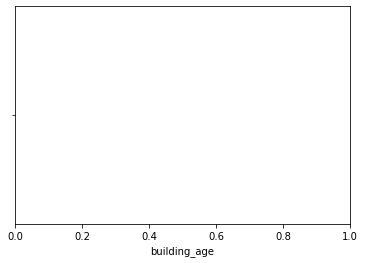

In [32]:
sns.boxplot(x=df2.building_age)

In [33]:
#Clean zipcode
#cols = ['zipcode']
#df[cols] = df[df[cols] > 1000][cols]
#len(df)

In [34]:
#df.zipcode = df.zipcode.astype(str)

# Explatory Data Analysis

IndexError: index 0 is out of bounds for axis 0 with size 0

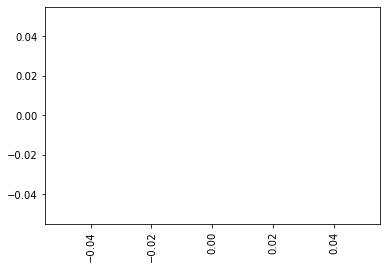

In [35]:
#Frequency of number of room in flats
df2['room'].value_counts().plot(kind='bar')
plt.title('number of Room')
plt.xlabel('Rooms')
plt.ylabel('Count')
sns.despine

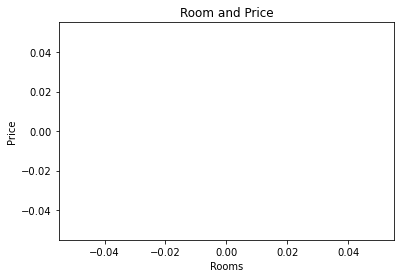

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [36]:
plt.scatter(df2.room,df2.price)
plt.title("Room and Price")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Square Meter')

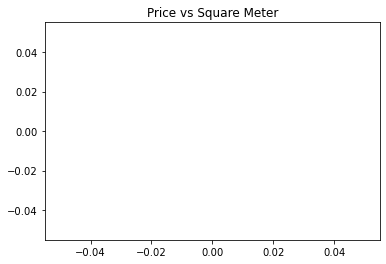

In [37]:
plt.scatter(df2.price,df2.sqm_living)
plt.title("Price vs Square Meter")

In [38]:
#plt.scatter(df.zipcode,df.price)
#plt.title("Expensive location by zipcode")

In [39]:
#Check Outliers

In [40]:
df2.describe()

,len_explanation
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<AxesSubplot:xlabel='price'>

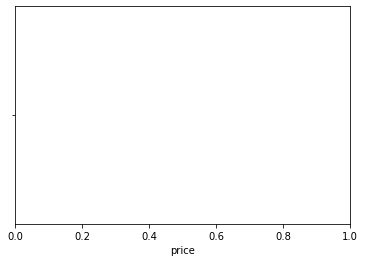

In [41]:
#Price box-plot
sns.boxplot(x=df2.price)

In [42]:
#Upper outer fence
outlier_limit=df2.price.quantile(0.75) + 3*((df2.price.quantile(0.75))-(df2.price.quantile(0.25)))
outlier_limit

nan

In [43]:
price_outlier_conditional = df2.price < outlier_limit
df2_without_outliers = df2[price_outlier_conditional]

<AxesSubplot:xlabel='price'>

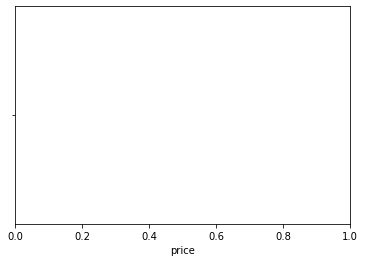

In [44]:
sns.boxplot(x=df2_without_outliers.price)

In [45]:
df2_without_outliers.describe()

,len_explanation
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [46]:
len(df2_without_outliers)

0

In [47]:
from scipy.stats import norm, skew

C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer u

ValueError: `dataset` input should have multiple elements.

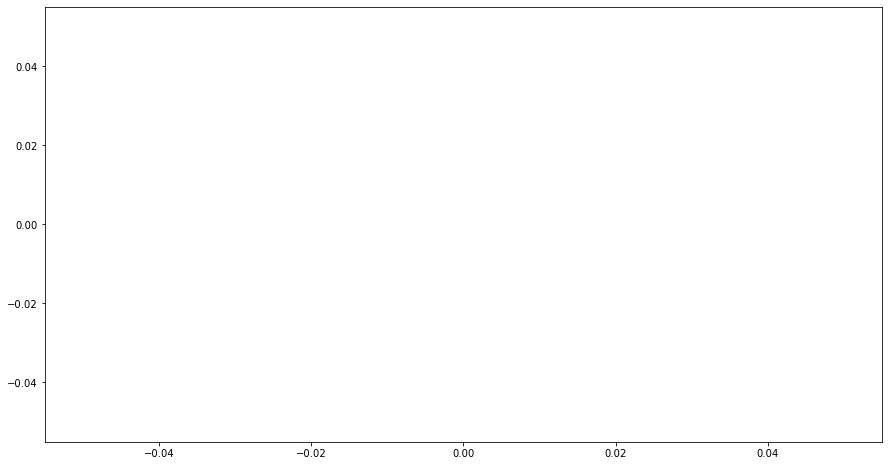

In [48]:
f, ax = plt.subplots(figsize =(15,8))
sns.distplot(df2_without_outliers['price'], rug = True, fit = norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency_Price")
ax.set(xlabel="Price")
ax.set(title="Distribution of Price")
sns.despine(trim=True, left=True)
plt.show();

In [49]:
print('Skew of Price:',df2_without_outliers['price'].skew())

Skew of Price: nan


ValueError: `dataset` input should have multiple elements.

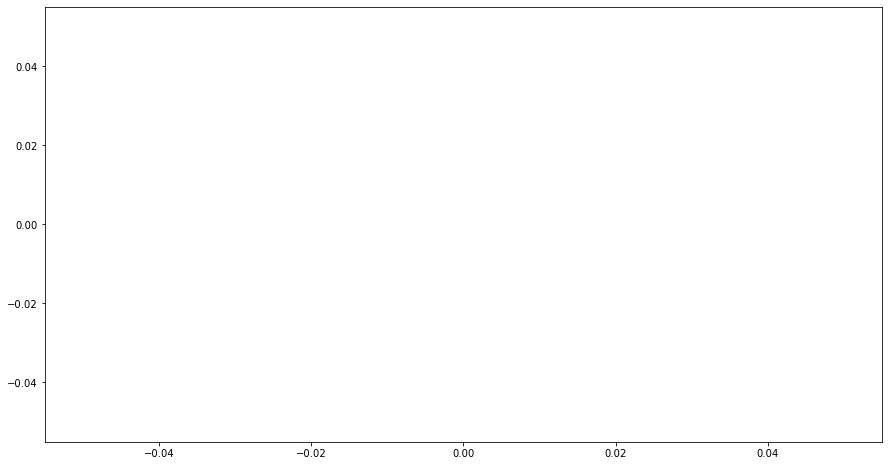

In [50]:
df2_without_outliers['log_price']=np.log(df2_without_outliers['price']+1)
f, ax = plt.subplots(figsize =(15,8))
sns.distplot(df2_without_outliers['log_price'], color="red", rug = True, fit = norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency Log_Price")
ax.set(xlabel="Log_Price")
ax.set(title="Distribution of Log_Price")
sns.despine(trim=True, left=True)
plt.show();
print('Skew of Log Price:',df2_without_outliers['log_price'].skew())

In [51]:
df2_without_outliers['log_sqm_living']=np.log(df2_without_outliers['sqm_living']+1)
df2_without_outliers['log_sqm_lot']=np.log(df2_without_outliers['sqm_lot']+1)
df2_without_outliers['log_len_explanation']=np.log(df2_without_outliers['len_explanation']+1)

Log_price became the output value (dependent variable) instead of price!

In [52]:
first_column = df2_without_outliers.pop('log_price')
df2_without_outliers.insert(0, 'log_price', first_column)

In [53]:
df2_without_outliers.drop(['price','sqm_living', 'sqm_lot', 'len_explanation'],axis=1 , inplace=True)

# Feature Selection

In [54]:
#Feature selection
Filter Method > Pearson Correlation > Correlation with target
Wrapper Methods > Forward / Backward Elimination /RFE
Embedded Methods > Lasso / Random Forest importance
Discuss feature selection methods available in Sci-Kit (sklearn.feature_selection), 
including cross-validated Recursive Feature Elimination (RFECV) and Univariate Feature Selection (SelectBest);

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

Discuss methods that can inherently be used to select regressors, such as Lasso and 
Decision Trees - Embedded Models (SelectFromModel); 

SyntaxError: invalid syntax (Temp/ipykernel_34684/2475448047.py, line 2)

## 1. Filter Methods

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1.1 Correlations

C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


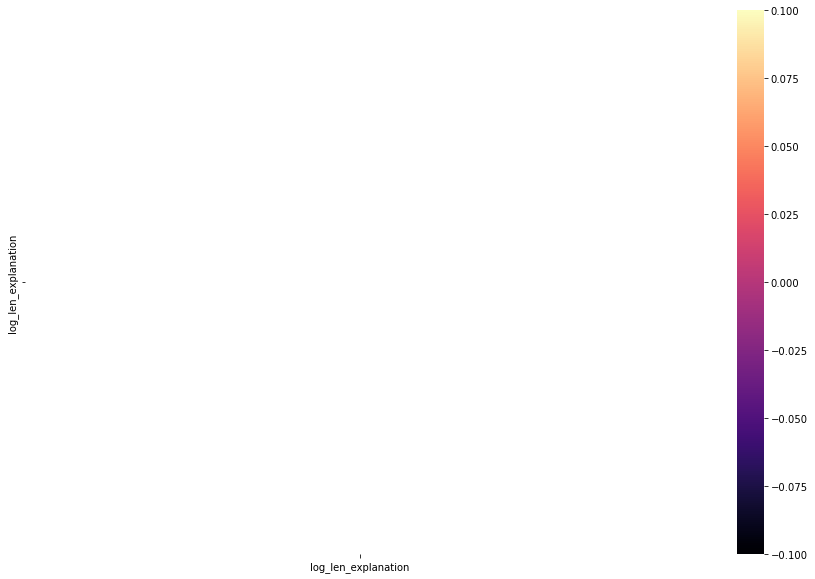

In [56]:
#Pearson Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df2_without_outliers.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [57]:
#Correlation with output variable
cor = df2_without_outliers.corr()
cor_target = abs(cor["log_price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
relevant_features.sort_values(ascending=False)
#df["price"] = x.target

KeyError: 'log_price'

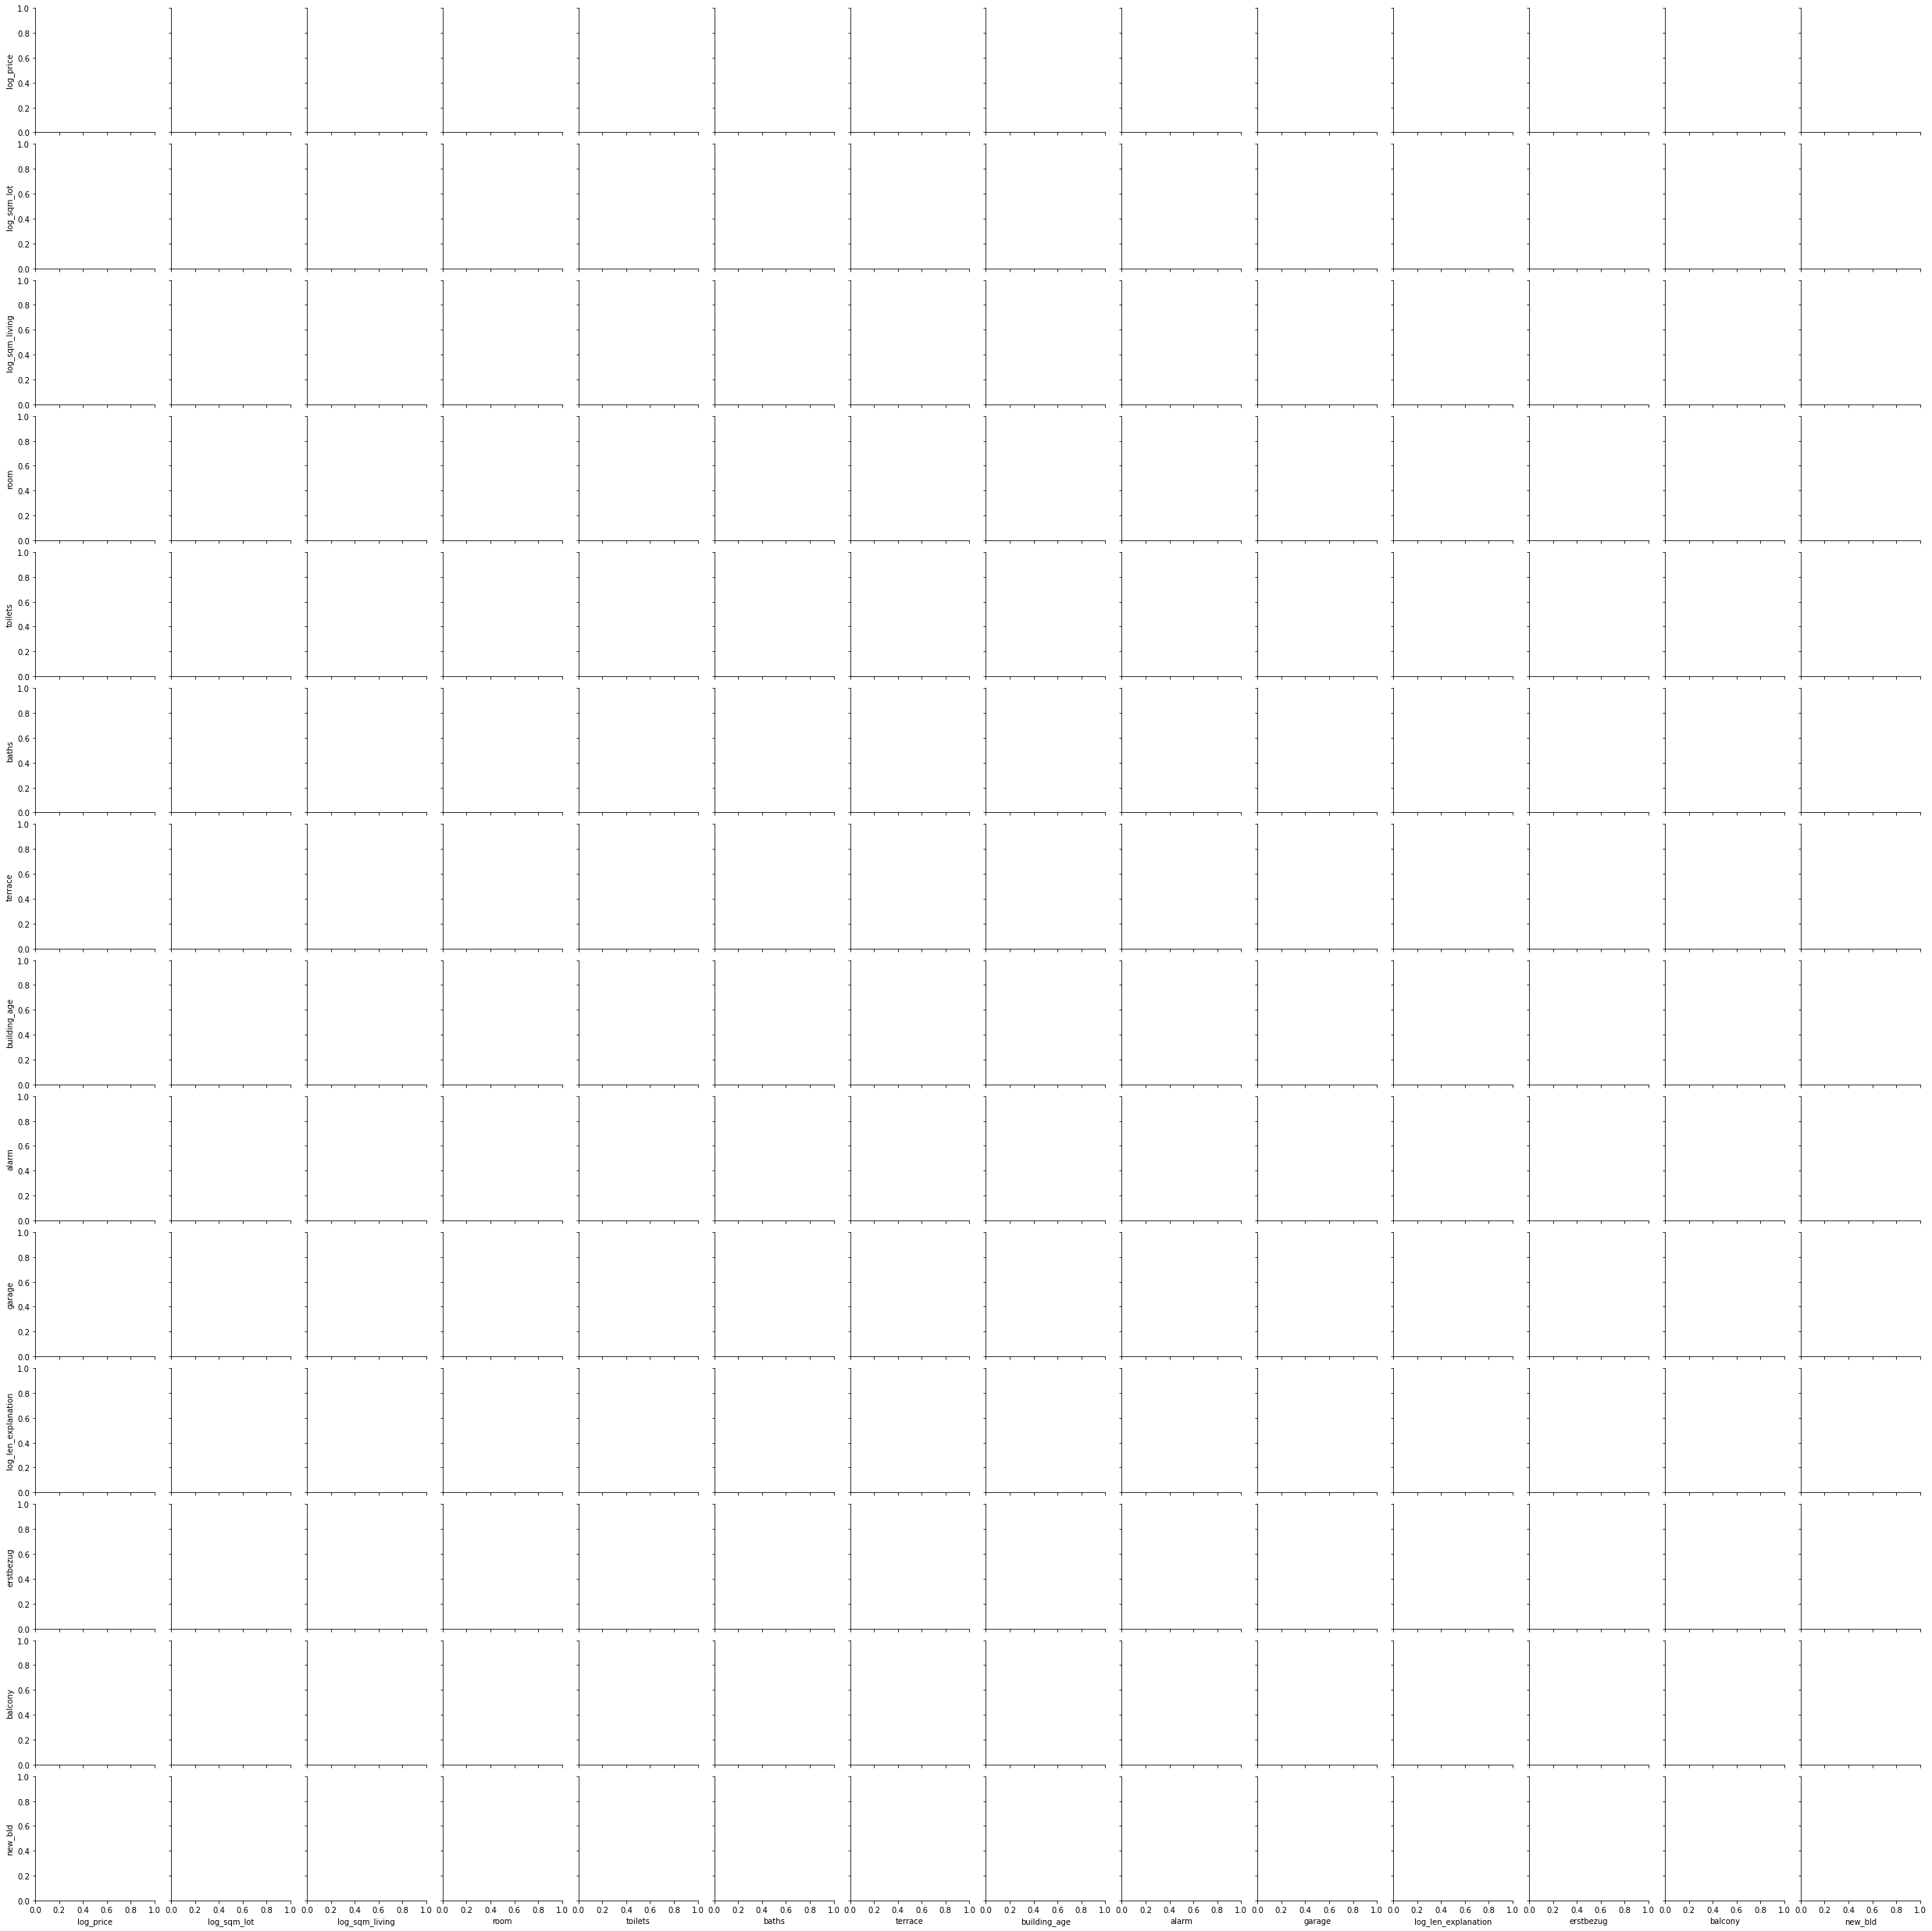

In [58]:
sns.pairplot(df2_without_outliers[['log_price', 'log_sqm_lot', 'log_sqm_living', 'room', 'toilets', 'baths', 'terrace','building_age',
                                   'alarm','garage','log_len_explanation','erstbezug', 'balcony','new_bld']])

Above correlation matrices indicates our output variable log_price is most corelated with these features; 
'log_price', 'log_sqm_lot', 'log_sqm_living', 'room', 'toilets', 'baths', 'terrace','building_age', 'alarm','garage','log_len_explanation','erstbezug', 'balcony','new_bld'

However, Multicollinearity must be considered in feature selection step.

In [59]:
df2_without_outliers=df2_without_outliers[['log_price', 'log_sqm_lot', 'log_sqm_living', 'room', 'toilets', 'baths', 'terrace','building_age',
                                   'alarm','garage','log_len_explanation','erstbezug', 'balcony','new_bld']]

###  1.2. Multicollinearity 

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be detected via VIF (Variable Inflation Factors). VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. 

In [60]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [61]:
X=df2_without_outliers.iloc[:,1:]
calc_vif(X)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
df2_without_outliers_v1 = df2_without_outliers.copy()
df2_without_outliers_v1['baths_at_joining'] = df2_without_outliers_v1.apply(lambda x: x['baths'] - x['toilets'],axis=1)
X = df2_without_outliers_v1.drop(['log_sqm_lot','baths','log_price','log_len_explanation'],axis=1)
calc_vif(X)

In [ ]:
df2_without_outliers_v1['log_sqm_living_at_joining'] = df2_without_outliers_v1.apply(lambda x: x['log_sqm_living'] - x['room'],axis=1)
X = df2_without_outliers_v1.drop(['log_sqm_lot','baths','log_price','log_len_explanation', 'log_sqm_living'],axis=1)
calc_vif(X)

In [ ]:
#Feature Selection Method : Correlation
y_11 = df2_without_outliers_v1["log_price"]
X_11=df2_without_outliers_v1[['room', 'toilets', 'terrace', 'building_age', 'alarm', 'garage', 'erstbezug', 
                              'balcony', 'new_bld', 'baths_at_joining', 'log_sqm_living_at_joining']]

## 2. Wrapper Methods 

In [ ]:
df2_without_outliers_v2 = df2_without_outliers.copy()
df2_without_outliers_v2.columns

### 2.1 Backward Elimination 

In [ ]:
#Wrapper Methods
import statsmodels.api as sm

X = df2_without_outliers_v2.drop("log_price",1)   #Feature Matrix
y = df2_without_outliers_v2["log_price"]  #Target Variable

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
#Feature Selection Method : Backward Elimination
y_21 = df2_without_outliers_v2["log_price"]
X_21=df2_without_outliers_v2[['log_sqm_lot', 'room', 'toilets', 'baths', 'terrace', 'building_age',
                              'alarm', 'garage', 'log_len_explanation', 'erstbezug', 'balcony']]

### 2.2 RFE 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
X.columns

In [ ]:
#Feature Selection Method : RFE
y_22 = df2_without_outliers_v2["log_price"]
X_22=df2_without_outliers_v2[['log_sqm_living', 'toilets', 'baths', 'terrace', 'alarm', 'erstbezug', 'balcony']]

# Machine Learning Algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from termcolor import colored as cl
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2

## 1. Features selected by correlations

In [ ]:
##Feature Selection Method : Correlation
X=X_11
y=y_11

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state =1)

In [ ]:
model_lreg = LinearRegression()
model_lreg.fit(x_train,y_train)
lr_yhat=model_lreg.predict(x_test)
mae=mean_absolute_error(y_test,lr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, lr_yhat)
print('MAE: %.3f' % mse)
#print('Score:  %.3f' % model_lreg.score(x_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,lr_yhat,alpha=0.1)
plt.plot(
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
         c="red",
         alpha=0.2,label="zero error line")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xticks(rotation=45)
plt.legend()
plt.style.use("default")
plt.show()

In [ ]:
#GradientBoosting Regressor
model_gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
model_gbr.fit(x_train, y_train)
gbr_yhat=model_gbr.predict(x_test)
mae=mean_absolute_error(y_test,gbr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, gbr_yhat)
print('MAE: %.3f' % mse)
#print('Score:  %.3f' % model_gbr.score(x_test,y_test))

In [ ]:
#XGBoost Regressor
model_xgb = xgb.XGBRegressor (learning_rate=0.1,
                       n_estimators=400,
                       max_depth=6,
                       min_child_weight=1.5,
                       gamma=0.0,
                       subsample=0.2,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       random_state=42) 
model_xgb.fit(x_train, y_train)
xgb_yhat=model_xgb.predict(x_test)
mae=mean_absolute_error(y_test,xgb_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, xgb_yhat)
print('MSE: %.3f' % mse)
#print('Score:  %.3f' % model_xgb.score(x_test,y_test))

In [ ]:
# R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of LR model is {}'.format(r2(y_test, lr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, gbr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of XGBoosting model is {}'.format(r2(y_test, xgb_yhat)), attrs = ['bold']))

## 2. Features selected by Backward Elimination

In [ ]:
##Feature Selection Method : Backward Elimination
X=X_21
y=y_21

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state =1)

In [ ]:
model_lreg = LinearRegression()
model_lreg.fit(x_train,y_train)
lr_yhat=model_lreg.predict(x_test)
mae=mean_absolute_error(y_test,lr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, lr_yhat)
print('MAE: %.3f' % mse)
#print('Score:  %.3f' % model_lreg.score(x_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,lr_yhat,alpha=0.1)
plt.plot(
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
         c="red",
         alpha=0.2,label="zero error line")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xticks(rotation=45)
plt.legend()
plt.style.use("default")
plt.show()

In [ ]:
#GradientBoosting Regressor
model_gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
model_gbr.fit(x_train, y_train)
gbr_yhat=model_gbr.predict(x_test)
mae=mean_absolute_error(y_test,gbr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, gbr_yhat)
print('MAE: %.3f' % mse)
#print('Score:  %.3f' % model_gbr.score(x_test,y_test))

In [ ]:
#XGBoost Regressor
model_xgb = xgb.XGBRegressor (learning_rate=0.1,
                       n_estimators=400,
                       max_depth=6,
                       min_child_weight=1.5,
                       gamma=0.0,
                       subsample=0.2,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       random_state=42) 
model_xgb.fit(x_train, y_train)
xgb_yhat=model_xgb.predict(x_test)
mae=mean_absolute_error(y_test,xgb_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, xgb_yhat)
print('MSE: %.3f' % mse)
#print('Score:  %.3f' % model_xgb.score(x_test,y_test))

In [ ]:
# R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of LR model is {}'.format(r2(y_test, lr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, gbr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of XGBoosting model is {}'.format(r2(y_test, xgb_yhat)), attrs = ['bold']))

## 3. Features selected by RFE

In [ ]:
##Feature Selection Method : RFE
X=X_22
y=y_22

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state =1)

In [ ]:
model_lreg = LinearRegression()
model_lreg.fit(x_train,y_train)
yhat=model_lreg.predict(x_test)
mae=mean_absolute_error(y_test,yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, yhat)
print('MAE: %.3f' % mse)
print('Score:  %.3f' % model_lreg.score(x_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,lr_yhat,alpha=0.1)
plt.plot(
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
         c="red",
         alpha=0.2,label="zero error line")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xticks(rotation=45)
plt.legend()
plt.style.use("default")
plt.show()

In [ ]:
#GradientBoosting Regressor
model_gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
model_gbr.fit(x_train, y_train)
gbr_yhat=model_gbr.predict(x_test)
mae=mean_absolute_error(y_test,gbr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, gbr_yhat)
print('MAE: %.3f' % mse)
print('Score:  %.3f' % model_gbr.score(x_test,y_test))

In [ ]:
#XGBoost Regressor
model_xgb = xgb.XGBRegressor (learning_rate=0.1,
                       n_estimators=400,
                       max_depth=5,
                       min_child_weight=1.5,
                       gamma=0.0,
                       subsample=0.2,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       random_state=42) 
model_xgb.fit(x_train, y_train)
xgb_yhat=model_xgb.predict(x_test)
mae=mean_absolute_error(y_test,xgb_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, xgb_yhat)
print('MSE: %.3f' % mse)
#print('Score:  %.3f' % model_xgb.score(x_test,y_test))

In [ ]:
# R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of LR model is {}'.format(r2(y_test, lr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, gbr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of XGBoosting model is {}'.format(r2(y_test, xgb_yhat)), attrs = ['bold']))

The Best Model is Gradient Boost with the r-square value of 0.82, whose features were selected according to the backward elimination method. The features are log_sqm_lot', 'room', 'toilets', 'baths', 'terrace', 'building_age', 'alarm', 'garage', 'log_len_explanation', 'erstbezug' and 'balcony'.